## Librerias

In [3]:
import json
import pandas as pd
import networkx as nx

from community import community_louvain


In [2]:
import json

import chardet

# First, read the file in binary mode
with open('mc3.json', 'rb') as file:
    raw_data = file.read()

# Detect encoding
encoding = chardet.detect(raw_data)['encoding']

# Now, open the file with the detected encoding
with open('mc3.json', 'r', encoding=encoding) as file:
    data = json.load(file)
# 44.9s

In [9]:
# Create a NetworkX graph from the data
# G = nx.node_link_graph(data, directed=True, multigraph=True)
G = nx.node_link_graph(data)

In [20]:
# Convert multigraph to a simple graph
simple_G = nx.DiGraph(G)  # This merges multiple edges into single ones

# Now calculate the centrality
eigenvector_centrality = nx.eigenvector_centrality(simple_G, max_iter=1000)
# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)
# Calculate Eigenvector Centrality
# eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame for better analysis and visualization
centrality_df = pd.DataFrame({
    'Degree Centrality': pd.Series(degree_centrality),
    'Eigenvector Centrality': pd.Series(eigenvector_centrality),
    'Betweenness Centrality': pd.Series(betweenness_centrality)
})

# Display top 10 nodes by Eigenvector Centrality
top_influencers = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False).head(20)
print(top_influencers)


                                           Degree Centrality   
SouthSeafood Express Corp                           0.000033  \
ScaniaSeafood Holdings Ltd. Liability Co            0.000017   
Tainamarine Fishing Co                              0.000033   
KambalaAqua Delivery Plc                            0.000050   
ArawakCharter Boat Transit Plc                      0.000050   
Francis-Yoder                                       0.000314   
ArawakFish Cargo Ges.m.b.H.                         0.000050   
Maacama Ocean Worldwide LLC                         0.000017   
WestRiver Shipping KgaA                             0.000017   
Oka Charter Boat Transport OJSC                     0.000017   
V. Miesel Shipping                                  0.000050   
Vasquez-Gonzalez                                    0.000182   
Dyer-Campbell                                       0.000430   
Dry CreekWorldLogistics Ltd. Liability Co           0.000017   
Clark, Johnson and Patrick              

In [21]:
centrality_df.to_csv('centrality.csv')

In [ ]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# print(f"Number of connected components: {nx.number_connected_components(G)}") NetworkXNotImplemented: not implemented for directed type


In [ ]:
# Filter nodes by type, for example, Companies
companies = [n for n, d in G.nodes(data=True) if d['type'] == 'Entity.Organization.Company']

# Explore edges of a specific type, e.g., Shareholdership
shareholder_edges = [(u, v) for u, v, d in G.edges(data=True) if d['type'] == 'Event.Owns.Shareholdership']


In [25]:
# Counting weakly connected components in a directed graph
print(f"Number of weakly connected components: {len(list(nx.weakly_connected_components(G)))}")

Number of weakly connected components: 4782


In [11]:
# Detect communities
# Assuming G is your directed graph
G_undirected = G.to_undirected()

# Apply the Louvain method to the undirected graph
partition = community_louvain.best_partition(G_undirected)


In [19]:
partition['SouthSeafood Express Corp']


4812

In [42]:
# Convert list of dictionaries to DataFrame
df_nodes = pd.DataFrame(data['nodes'])
df_links = pd.DataFrame(data['links'])


In [41]:
def parse_dates(x):
    for fmt in ("%Y-%m-%dT%H:%M:%S", "%Y-%m-%d"):
        try:
            return pd.to_datetime(x, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return Not a Time for unparseable formats


In [44]:
df_nodes['founding_date'] = pd.to_datetime(df_nodes['founding_date'])
df_nodes['_last_edited_date'] = pd.to_datetime(df_nodes['_last_edited_date'])
df_nodes['_date_added'] = pd.to_datetime(df_nodes['_date_added'])
df_nodes['dob'] = df_nodes['dob'].apply(parse_dates)


In [45]:
df_links['start_date'] = df_links['start_date'].apply(parse_dates)
df_links['end_date'] = df_links['end_date'].apply(parse_dates)
df_links['_last_edited_date'] = pd.to_datetime(df_links['_last_edited_date'])
df_links['_date_added'] = pd.to_datetime(df_links['_date_added'])

In [52]:
df_links.shape

(75817, 11)

In [62]:
print((df_links['source']=='SouthSeafood Express Corp').sum())
print((df_links['target']=='SouthSeafood Express Corp').sum())

0
2


In [54]:
df_nodes[df_nodes['id']=='SouthSeafood Express Corp']


,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60463,Entity.Organization.FishingCompany,Oceanus,Fishing and other related activities,Luce du Adam,Achille Forza,2032-11-05,6529.36,Offering comprehensive fishing solutions and r...,Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,SouthSeafood Express Corp,NaT


In [51]:
df_links[df_links['target']=='SouthSeafood Express Corp']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75663,2033-10-29,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,AguaLeska Transit N.V.,SouthSeafood Express Corp,0,2035-05-25
75699,2035-05-25,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15,2035-06-15,Oceanus Corporations Monthly - May '35,Manual Entry,Tainamarine Fishing Co,SouthSeafood Express Corp,0,NaT


In [55]:
# Define the cutoff date
cutoff_date = pd.Timestamp('2035-05-25')

# Filter the dataframes
links_before = df_links[df_links['start_date'] < cutoff_date]
links_after = df_links[df_links['start_date'] >= cutoff_date]

In [56]:
# Initialize two graphs
G_before = nx.Graph()  # or nx.DiGraph() if directed
G_after = nx.Graph()  # or nx.DiGraph() if directed

# Add nodes to both graphs
for node in data['nodes']:
    G_before.add_node(node['id'], **node)
    G_after.add_node(node['id'], **node)

# Add filtered edges to the 'before' graph
for _, link in links_before.iterrows():
    G_before.add_edge(link['source'], link['target'], **link)

# Add filtered edges to the 'after' graph
for _, link in links_after.iterrows():
    G_after.add_edge(link['source'], link['target'], **link)


In [61]:
# Convert multigraph to a simple graph
simple_G_before = nx.DiGraph(G_before)  # This merges multiple edges into single ones
simple_G_after = nx.DiGraph(G_after)  # This merges multiple edges into single ones

# Now calculate the centrality
eigenvector_centrality_simple_G_before = nx.eigenvector_centrality(simple_G_before, max_iter=1000)
eigenvector_centrality_simple_G_after = nx.eigenvector_centrality(simple_G_after, max_iter=1000)
# Calculate Degree Centrality
degree_centrality_G_before = nx.degree_centrality(G_before)
degree_centrality_G_after = nx.degree_centrality(G_after)

# Calculate Eigenvector Centrality
# eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
# Calculate Betweenness Centrality
betweenness_centrality_G_before = nx.betweenness_centrality(G_before)
betweenness_centrality_G_after = nx.betweenness_centrality(G_after)

# Convert to DataFrame for better analysis and visualization
centrality_df = pd.DataFrame({
    'Degree_Centrality_before': pd.Series(degree_centrality_G_before),
    'Eigenvector_Centrality_before': pd.Series(eigenvector_centrality_simple_G_before),
    'Betweenness Centrality_before': pd.Series(betweenness_centrality_G_before),
    'Degree_Centrality_after': pd.Series(degree_centrality_G_after),
    'Eigenvector_Centrality_after': pd.Series(eigenvector_centrality_simple_G_after),
    'Betweenness Centrality_after': pd.Series(betweenness_centrality_G_after)
})
centrality_df.to_csv('centrality_after_before_change_ownership_seafood.csv')


In [58]:
# Display top 10 nodes by Eigenvector Centrality
top_influencers = centrality_df.sort_values(by='Eigenvector_Centrality_before', ascending=False).head(20)
print(top_influencers)


                  Degree_Centrality_before  Degree_Centrality_after   
Anna Davis                        0.001504                 0.000017  \
Anne Villanueva                   0.001504                 0.000017   
Jennifer Gardner                  0.001504                 0.000017   
Sandra Young                      0.001504                 0.000017   
Melissa Davis                     0.001487                 0.000017   
Cynthia Anderson                  0.001487                 0.000017   
Katie Evans                       0.001487                 0.000017   
Wesley Phillips                   0.001487                 0.000017   
Alan Richardson                   0.001487                 0.000017   
Joseph Brown                      0.001487                 0.000017   
Jason Anderson                    0.001487                 0.000017   
Aaron Delgado                     0.001487                 0.000017   
Kelsey Ortega                     0.001487                 0.000017   
Breann

In [59]:
# Display top 10 nodes by Eigenvector Centrality
top_influencers = centrality_df.sort_values(by='Eigenvector_Centrality_after', ascending=False).head(20)
print(top_influencers)


                      Degree_Centrality_before  Degree_Centrality_after   
Polák Procházka a.s.                  0.000000                 0.000562  \
Kelsey Ortega                         0.001487                 0.000017   
Alan Richardson                       0.001487                 0.000017   
Dana Moore                            0.000281                 0.000017   
Sharon Moon                           0.000463                 0.000017   
Anne Villanueva                       0.001504                 0.000017   
Joseph Gentry                         0.001487                 0.000017   
Cynthia Anderson                      0.001487                 0.000017   
Anna Davis                            0.001504                 0.000017   
Katie Evans                           0.001487                 0.000017   
Jennifer Gardner                      0.001504                 0.000017   
Wesley Phillips                       0.001487                 0.000017   
Joseph Brown             

In [ ]:
Jennifer Gardner

## EDA

In [67]:
df_nodes.describe(include='all')

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
count,60520,60520,8871,8846,8862,8871,8.855000e+03,8871,60520,60520,60520,60520,60520,60520,51649
unique,8,86,3219,8532,8795,NaN,NaN,4124,3,NaN,NaN,13,2,60520,NaN
top,Entity.Person,Oceanus,Unknown,Emily Williams,James Smith,NaN,NaN,Unknown,Pelagia Alethea Mordoch,NaN,NaN,Existing Corporate Structure Data,Automatic Import,"Abbott, Mcbride and Edwards",NaN
freq,50356,4952,4741,6,3,NaN,NaN,4738,60089,NaN,NaN,60091,60089,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,1991-04-22 15:54:58.072370688,2.786319e+05,NaN,NaN,2035-01-02 10:34:13.403833344,2035-01-02 10:28:32.200925440,NaN,NaN,NaN,1987-05-31 15:59:42.156479232
min,NaN,NaN,NaN,NaN,NaN,1945-01-01 00:00:00,0.000000e+00,NaN,NaN,2035-01-01 00:00:00,2035-01-01 00:00:00,NaN,NaN,NaN,1970-01-02 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,1968-01-11 00:00:00,0.000000e+00,NaN,NaN,2035-01-01 00:00:00,2035-01-01 00:00:00,NaN,NaN,NaN,1978-02-03 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,1991-07-03 00:00:00,8.233590e+03,NaN,NaN,2035-01-01 00:00:00,2035-01-01 00:00:00,NaN,NaN,NaN,1986-02-14 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,2014-09-04 12:00:00,2.634055e+04,NaN,NaN,2035-01-01 00:00:00,2035-01-01 00:00:00,NaN,NaN,NaN,1995-05-25 00:00:00
max,NaN,NaN,NaN,NaN,NaN,2035-12-29 00:00:00,3.106123e+08,NaN,NaN,2036-01-15 00:00:00,2036-01-15 00:00:00,NaN,NaN,NaN,2017-03-20 00:00:00


In [63]:
df_links.describe(include='all')


,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
count,75727,75817,75817,75817,75817,75817,75817,75817,75817,75817.000000,348
unique,NaN,4,2,NaN,NaN,13,2,51996,8926,NaN,NaN
top,NaN,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,NaN,NaN,Existing Corporate Structure Data,Automatic Import,Jennifer Gardner,Downs Group,NaN,NaN
freq,NaN,39378,74711,NaN,NaN,74711,74711,92,120,NaN,NaN
mean,2022-09-05 09:36:25.328878592,NaN,NaN,2035-01-03 20:36:40.730706688,2035-01-03 00:05:41.875832576,NaN,NaN,NaN,NaN,0.208067,2035-06-11 03:02:04.137931008
min,1952-05-31 00:00:00,NaN,NaN,2035-01-01 00:00:00,2035-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,2035-01-01 00:00:00
25%,2015-06-07 00:00:00,NaN,NaN,2035-01-01 00:00:00,2035-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,2035-03-16 00:00:00
50%,2023-12-12 00:00:00,NaN,NaN,2035-01-01 00:00:00,2035-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,2035-05-19 00:00:00
75%,2030-09-21 12:00:00,NaN,NaN,2035-01-01 00:00:00,2035-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,2035-08-10 00:00:00
max,2035-12-29 00:00:00,NaN,NaN,2036-01-15 00:00:00,2036-01-15 00:00:00,NaN,NaN,NaN,NaN,2.000000,2035-12-29 00:00:00


In [64]:
df_links['source'].value_counts()

source
Jennifer Gardner    92
Anna Davis          92
Sandra Young        92
Anne Villanueva     92
Kelsey Ortega       91
                    ..
Beverly Obrien       1
Brandon Stevens      1
Megan Mcguire        1
Robert Love          1
Mandy Ramos          1
Name: count, Length: 51996, dtype: int64

In [65]:
df_links['target'].value_counts()

target
Downs Group                      120
Mills, Atkinson and Chavez        92
Walton-Blair                      81
Mosley and Sons                   75
Keith, Cervantes and Torres       75
                                ... 
Molina, Rodriguez and Jackson      1
Mills, Gallegos and Mcdaniel       1
Miller-Marks                       1
Henry, Edwards and Bartlett        1
Robert Mccarthy II                 1
Name: count, Length: 8926, dtype: int64

In [66]:
df_links['start_date'].describe()

count                            75727
mean     2022-09-05 09:36:25.328878592
min                1952-05-31 00:00:00
25%                2015-06-07 00:00:00
50%                2023-12-12 00:00:00
75%                2030-09-21 12:00:00
max                2035-12-29 00:00:00
Name: start_date, dtype: object

In [70]:
df_nodes[df_nodes['id']=='Tainamarine Fishing Co']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60467,Entity.Organization.FishingCompany,Oceanus,Fish and seafood products,Jeffrey Wilson,Mario Sandoval,2035-05-20,77826.74,Offering an extensive range of premium fish an...,Niklaus Oberon,2035-06-15,2035-06-15,Oceanus Corporations Monthly - May '35,Manual Entry,Tainamarine Fishing Co,NaT


In [71]:
df_links[df_links['target']=='Tainamarine Fishing Co']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75700,2035-05-20,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15,2035-06-15,Oceanus Corporations Monthly - May '35,Manual Entry,V. Miesel Shipping,Tainamarine Fishing Co,0,NaT


In [79]:
list(simple_G.neighbors("SouthSeafood Express Corp"))


[]

In [94]:
df_nodes['type'].unique()
array(['Entity.Organization.Company',
       'Entity.Organization.LogisticsCompany',
       'Entity.Organization.FishingCompany',
       'Entity.Organization.FinancialCompany',
       'Entity.Organization.NewsCompany', 'Entity.Organization.NGO',
       'Entity.Person', 'Entity.Person.CEO'], dtype=object)

array(['Entity.Organization.Company',
       'Entity.Organization.LogisticsCompany',
       'Entity.Organization.FishingCompany',
       'Entity.Organization.FinancialCompany',
       'Entity.Organization.NewsCompany', 'Entity.Organization.NGO',
       'Entity.Person', 'Entity.Person.CEO'], dtype=object)

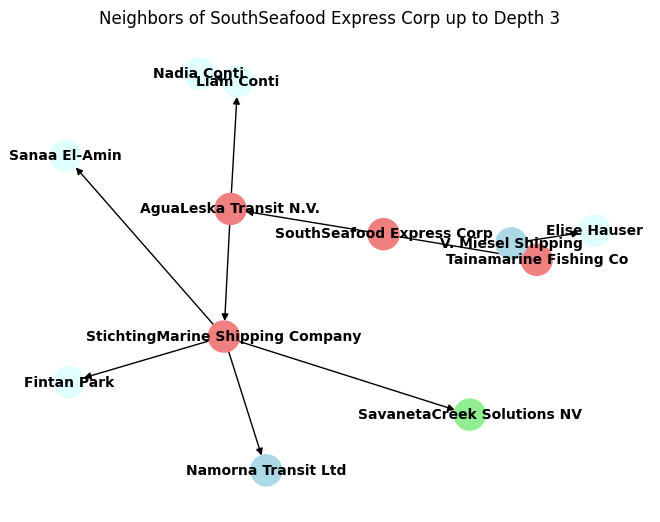

In [100]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.node_link_graph(data)

# Set the initial node
initial_node = "SouthSeafood Express Corp"
depth = 3  # Set the desired depth

# Create a subgraph by iteratively adding neighbors
subgraph = nx.DiGraph()
subgraph.add_node(initial_node, type=df_nodes[df_nodes['id'] == initial_node]['type'].values[0])  # Add the initial node to the subgraph
nodes_to_explore = [(initial_node, 0)]  # Initialize with the initial node and depth 0

# Explore neighbors up to the specified depth
while nodes_to_explore:
    node, node_depth = nodes_to_explore.pop(0)  # Get the next node to explore
    if node_depth < depth:
        neighbors = list(G.neighbors(node)) + list(G.predecessors(node))  # Get neighbors and predecessors
        for neighbor in neighbors:
            if neighbor not in subgraph.nodes:
                node_type = df_nodes[df_nodes['id'] == neighbor]['type'].values[0]
                subgraph.add_node(neighbor, type=node_type)  # Add node with its type
                subgraph.add_edge(node, neighbor)
                nodes_to_explore.append((neighbor, node_depth + 1))

# Define color mapping based on node type
color_mapping = {
    'Entity.Organization.Company': 'lightblue',
    'Entity.Organization.LogisticsCompany': 'lightgreen',
    'Entity.Organization.FishingCompany': 'lightcoral',
    'Entity.Organization.FinancialCompany': 'lightyellow',
    'Entity.Organization.NewsCompany': 'lightpink',
    'Entity.Organization.NGO': 'lightgrey',
    'Entity.Person': 'lightcyan',
    'Entity.Person.CEO': 'lightorange'
}

# Draw the subgraph with node colors based on type
pos = nx.spring_layout(subgraph)  # Layout for the nodes
node_colors = [color_mapping[subgraph.nodes[node]['type']] for node in subgraph.nodes]
nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_weight='bold')
plt.title(f"Neighbors of {initial_node} up to Depth {depth}")
plt.show()


In [128]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Create a directed graph
G = nx.node_link_graph(data)

# Set the initial node
initial_node = "SouthSeafood Express Corp"
depth = 3  # Set the desired depth

# Create a subgraph by iteratively adding neighbors
subgraph = nx.DiGraph()
subgraph.add_node(initial_node, type=df_nodes[df_nodes['id'] == initial_node]['type'].values[0])  # Add the initial node to the subgraph
nodes_to_explore = [(initial_node, 0)]  # Initialize with the initial node and depth 0

# Explore neighbors up to the specified depth
while nodes_to_explore:
    node, node_depth = nodes_to_explore.pop(0)  # Get the next node to explore
    if node_depth < depth:
        neighbors = list(G.neighbors(node)) + list(G.predecessors(node))  # Get neighbors and predecessors
        for neighbor in neighbors:
            if neighbor not in subgraph.nodes:
                node_type = df_nodes[df_nodes['id'] == neighbor]['type'].values[0]
                subgraph.add_node(neighbor, type=node_type)  # Add node with its type
                subgraph.add_edge(node, neighbor)
                nodes_to_explore.append((neighbor, node_depth + 1))

# Define color mapping based on node type
color_mapping = {
    'Entity.Organization.Company': 'lightblue',
    'Entity.Organization.LogisticsCompany': 'lightgreen',
    'Entity.Organization.FishingCompany': 'lightcoral',
    'Entity.Organization.FinancialCompany': 'lightyellow',
    'Entity.Organization.NewsCompany': 'lightpink',
    'Entity.Organization.NGO': 'lightgrey',
    'Entity.Person': 'lightcyan',
    'Entity.Person.CEO': 'lightorange'
}

# Create edge traces
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Add edge coordinates
for edge in subgraph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create node traces
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    hovertext=[],  # Initialize hovertext as an empty list
    mode='markers+text',  # Add text directly on markers
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Add node coordinates and tooltips
for node in subgraph.nodes():
    x, y = pos[node]  # Assuming you have pos defined
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)  # Only the name of the node
    node_data = df_nodes[df_nodes['id'] == node].to_dict('records')[0]
    node_trace['hovertext'] += (f"<b>{node}</b><br>{'<br>'.join([f'{key}: {value}' for key, value in node_data.items()])}",)  # Additional data when hovering
    node_trace['marker']['color'] += (color_mapping[subgraph.nodes[node]['type']],)

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Network graph made with Plotly',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    hoverlabel=dict(
                        bgcolor='rgba(255, 255, 255, 0.8)',  # Transparent background color for hover label
                    ),
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Python code: <a href='https://plotly.com/python/'>Plotly Python</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Show plot
fig.show()


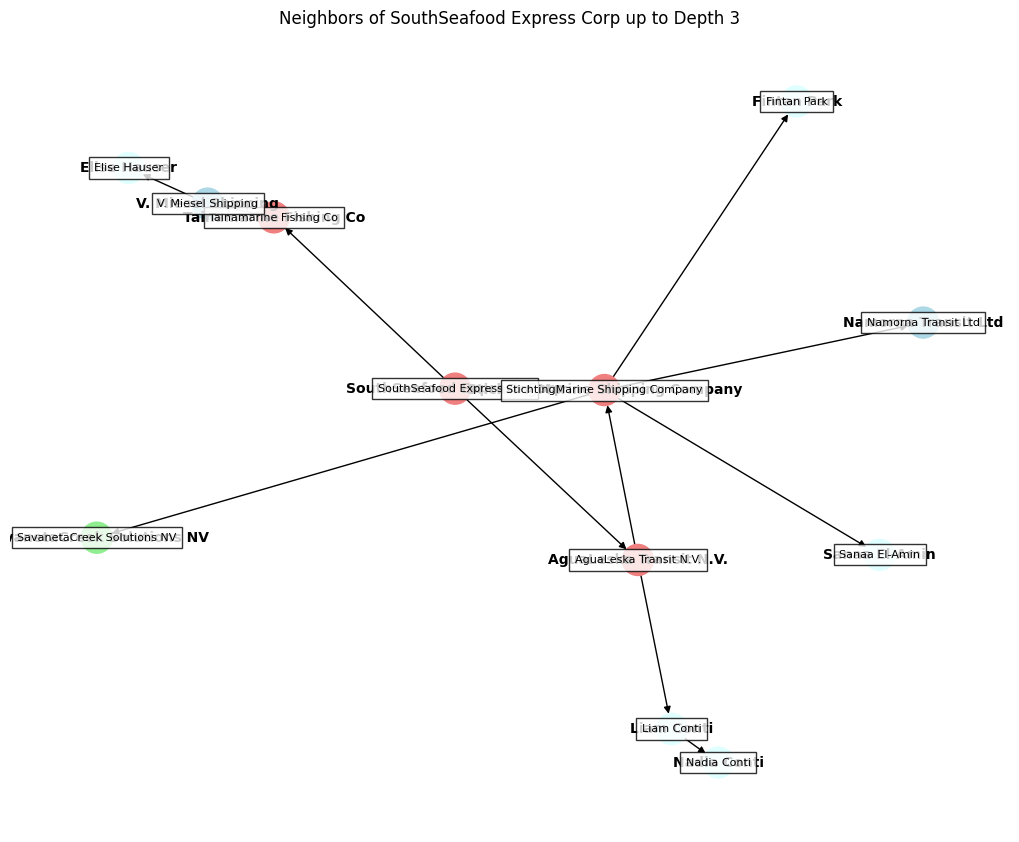

In [119]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.node_link_graph(data)

# Set the initial node
initial_node = "SouthSeafood Express Corp"
depth = 3  # Set the desired depth

# Create a subgraph by iteratively adding neighbors
subgraph = nx.DiGraph()
subgraph.add_node(initial_node, type=df_nodes[df_nodes['id'] == initial_node]['type'].values[0])  # Add the initial node to the subgraph
nodes_to_explore = [(initial_node, 0)]  # Initialize with the initial node and depth 0

# Explore neighbors up to the specified depth
while nodes_to_explore:
    node, node_depth = nodes_to_explore.pop(0)  # Get the next node to explore
    if node_depth < depth:
        neighbors = list(G.neighbors(node)) + list(G.predecessors(node))  # Get neighbors and predecessors
        for neighbor in neighbors:
            if neighbor not in subgraph.nodes:
                node_type = df_nodes[df_nodes['id'] == neighbor]['type'].values[0]
                subgraph.add_node(neighbor, type=node_type)  # Add node with its type
                subgraph.add_edge(node, neighbor)
                nodes_to_explore.append((neighbor, node_depth + 1))

# Define color mapping based on node type
color_mapping = {
    'Entity.Organization.Company': 'lightblue',
    'Entity.Organization.LogisticsCompany': 'lightgreen',
    'Entity.Organization.FishingCompany': 'lightcoral',
    'Entity.Organization.FinancialCompany': 'lightyellow',
    'Entity.Organization.NewsCompany': 'lightpink',
    'Entity.Organization.NGO': 'lightgrey',
    'Entity.Person': 'lightcyan',
    'Entity.Person.CEO': 'lightorange'
}

# Draw the subgraph with node colors based on type
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph)  # Layout for the nodes
node_colors = [color_mapping[subgraph.nodes[node]['type']] for node in subgraph.nodes]
nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_weight='bold')

# Create tooltips for each node
tooltips = {node: f"{node}: {df_nodes[df_nodes['id'] == node].to_dict('records')[0]}" for node in subgraph.nodes}

# Add tooltips
for node, (x, y) in pos.items():
    plt.text(x, y, node, bbox=dict(facecolor='white', alpha=0.8), fontsize=8, ha='center', va='center')

plt.title(f"Neighbors of {initial_node} up to Depth {depth}")
plt.show()


In [88]:
df_nodes[df_nodes['id'] in list(subgraph.nodes)]

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60428,Entity.Organization.FishingCompany,Oceanus,Fish and seafood products,Mary Gaines,Angela Vasquez,2032-08-30,49556.34,As a leading provider of fish and seafood prod...,Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,AguaLeska Transit N.V.,NaT
60448,Entity.Organization.Company,Nalakimani,Seafood products,Sanaa El-Amin,Donald Carson,2035-05-18,29862.48,Bringing the bounty of the ocean to your table...,Niklaus Oberon,2035-06-15,2035-06-15,Oceanus Corporations Monthly - May '35,Manual Entry,Namorna Transit Ltd,NaT
60460,Entity.Organization.LogisticsCompany,Oceanus,"Shipping, freight trucking and other related t...",Rafael Sanchez,Fintan Park,2031-01-15,5214.44,"Your all-encompassing logistics partner, offer...",Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,SavanetaCreek Solutions NV,NaT
60463,Entity.Organization.FishingCompany,Oceanus,Fishing and other related activities,Luce du Adam,Achille Forza,2032-11-05,6529.36,Offering comprehensive fishing solutions and r...,Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,SouthSeafood Express Corp,NaT
60465,Entity.Organization.FishingCompany,Oceanus,Fish and seafood products,Tammy Lane,Andrea Gallagher,2031-05-01,9652.46,Bringing the finest selection of responsibly s...,Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,StichtingMarine Shipping Company,NaT
60467,Entity.Organization.FishingCompany,Oceanus,Fish and seafood products,Jeffrey Wilson,Mario Sandoval,2035-05-20,77826.74,Offering an extensive range of premium fish an...,Niklaus Oberon,2035-06-15,2035-06-15,Oceanus Corporations Monthly - May '35,Manual Entry,Tainamarine Fishing Co,NaT
60468,Entity.Organization.Company,Nalakimani,Seafood products,Elise Hauser,Helena Abraham Valverde,2035-05-18,29757.05,Your trusted source for a diverse selection of...,Niklaus Oberon,2035-06-15,2035-06-15,Oceanus Corporations Monthly - May '35,Manual Entry,V. Miesel Shipping,NaT
60476,Entity.Person,Oceanus,NaN,NaN,NaN,NaT,NaN,NaN,Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,Liam Conti,2010-08-16
60477,Entity.Person,Oceanus,NaN,NaN,NaN,NaT,NaN,NaN,Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,Nadia Conti,1988-04-06
60478,Entity.Person,Oceanus,NaN,NaN,NaN,NaT,NaN,NaN,Pelagia Alethea Mordoch,2035-01-01,2035-01-01,Existing Corporate Structure Data,Automatic Import,Fintan Park,2006-06-22


In [86]:
nodes_to_explore
list(subgraph.nodes())

['SouthSeafood Express Corp',
 'AguaLeska Transit N.V.',
 'Tainamarine Fishing Co',
 'StichtingMarine Shipping Company',
 'Liam Conti',
 'V. Miesel Shipping',
 'Namorna Transit Ltd',
 'SavanetaCreek Solutions NV',
 'Fintan Park',
 'Sanaa El-Amin',
 'Nadia Conti',
 'Elise Hauser']